### Today:
* Intrudiction to Computer Vision
    * Basic operations
    * GUI featuers
    * Image processing
        * Changing color spaces
        * Geometric Transformations
        * Image thresholding
        * Smoothing
        * Morphological Transformations
        * Contours
* Video Analysis
    * Background Subtraction
    * Ball finding

### Resources:
* Official documentation: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
* Good blog about CV: https://www.pyimagesearch.com/

In [1]:
from matplotlib import pyplot as plt

import cv2
import numpy as np

In [2]:
PATH = '../../data/09_CV/'

In [75]:
img = cv2.imread(PATH + 'lena.png')

In [13]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite(PATH + 'lena_processed.png', gray)

True

In [28]:
img = np.zeros((512, 512, 3), np.uint8)

img = cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 5)

img = cv2.rectangle(img, (350, 10), (500, 120), (0, 255, 0), 3)

img = cv2.circle(img, (100, 100), 20, (0, 0, 255), 0, cv2.LINE_AA)

font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img, 'OpenCV', (10, 200), font, 1.5, (255, 255, 255), 1, cv2.LINE_AA)

In [35]:
print(img[100, 100])
img[100, 100] = [0, 0, 0]

print(img.item(10, 10, 1))
img.itemset((10, 10, 2), 100)

[0 0 0]
131


In [36]:
print('Shape: ', img.shape)
print('Size: ', img.size)
print('Type: ', img.dtype)

Shape:  (512, 512, 3)
Size:  786432
Type:  uint8


In [37]:
roi = img[200:400, 200:400]

In [54]:
b, g, r = cv2.split(img)
img = cv2.merge((b, g, r))

In [55]:
img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=[255, 0, 0])

In [57]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)

In [70]:
roi = img[200:300, 200:300]
res = cv2.resize(roi, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)

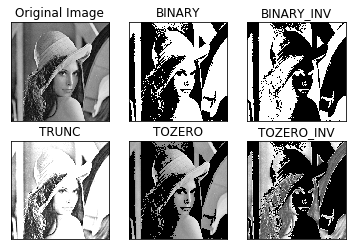

In [76]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

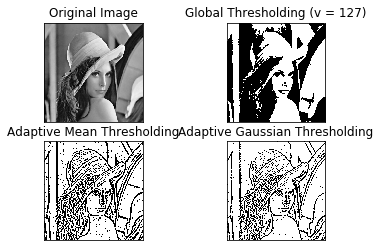

In [77]:
img = cv2.medianBlur(img, 5)

ret,th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [71]:
cv2.imshow('Title', res)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [78]:
kernel = np.ones((5, 5), np.float32) / 25
dst = cv2.filter2D(img, -1, kernel)

cv2.imshow('Averaging filter', np.hstack([img, dst]))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [79]:
blur = cv2.blur(img, (10, 10))
gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
median = cv2.medianBlur(img, 5)

cv2.imshow('Blur filter', np.hstack([img, blur]))
cv2.waitKey(0)
cv2.destroyAllWindows()